In [2]:
%load_ext autoreload
%autoreload 2

from util import *
from deepdream import *
from dream import *
from bookmarks import *

# deepdream parameters, to display: print(params)
params = DeepDreamArgs()
params.tile_size = 512
params.model_file = 'model/tensorflow_inception_graph.pb'

# setup deepdream, print out available layers
deepdream = DeepDream(params)
deepdream.print_layers()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/bzion/.local/share/virtualenvs/ml4a-UnCfiC34/lib/python3.6/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Number of layers: 59
Total number of feature channels: 7548
 * import2d0_pre_relu (64)
 * import2d1_pre_relu (64)
 * import2d2_pre_relu (192)
 * mixed3a_1x1_pre_relu (64)
 * mixed3a_3x3_bottleneck_pre_relu (96)
 * mixed3a_3x3_pre_relu (128)
 * mixed3a_5x5_bottleneck_pre_relu (16)
 * mixed3a_5x5_pre_relu (32)
 * mixed3a_pool_reduce_pre_relu (32)
 * mixed3b_1x1_pre_relu (128)
 * mixed3b_3x3_bottleneck_pre_relu (128)
 * mixed3b_3x3_pre_relu (192)
 * mixed3b_5x5_bottleneck_pre_relu (32)
 * mixed3b_5x5_pre_relu (96)
 * mixed3b_pool_reduce_pre_relu (64)
 * mixed4a_1x1_pre_relu (192)
 * mixed4a_3x3_bottleneck_pre_relu (96)
 * mixed4a_3x3_pre_relu (204)
 * mixed4a_5x5_bottleneck_pre_relu (16)
 * mixed4a_5x5_pre_relu (48)
 * mixed4a_pool_reduce_pre_relu (64)
 * mixed4b_1x1_pre_relu (160)
 * mixed4b_3x3_bottleneck_pre_relu (112)
 * mixed4b_3x3_pre_relu (224)
 * mixed4b_5x5_bottleneck_pre_relu (24)
 * mixed4b_5x5_pre_relu (64)
 * mixed4b_pool_reduce_pre_relu (64)
 * mixed4c_1x1_pre_relu (128)
 * 

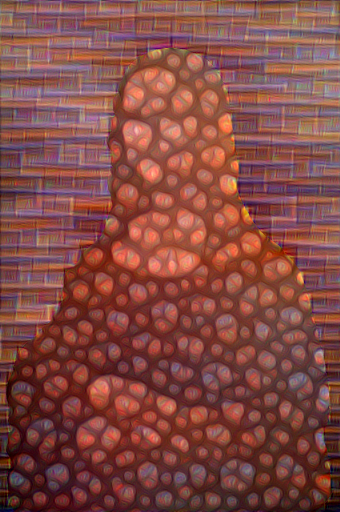

In [3]:
channels = get_random_favorites(layers_m3, 2)

config = {
    'objective': channels,
    'num_octaves': 5,
    'octave_ratio': 1.333,
    'num_iterations': 32,
    'lap_n': 5,
    'masks': [
        'images/monalisa1a.png',
        'images/monalisa1b.png'
    ],
    'step': 1.25,
    'size': 512,
    'grayscale_gradients': False,
    'normalize_gradients': True
}


img = load_image('images/monalisa.jpg', 128)  #random_image((2048, 2048))
img = run_deepdream(deepdream, config, img)
display(img)
save(img, 'output.png')

